<a href="https://colab.research.google.com/github/Krishna111972/DS-sentiment-analysis-/blob/main/sentiment_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
"""This notebook analyzes comments from a YouTube trailer
to predict how well the trailer (and potentially the movie)
 might perform based on audience sentiment.
It uses natural language processing (NLP) and sentiment analysis techniques
 to determine whether comments are positive, negative, or neutral."""

'This notebook analyzes comments from a YouTube trailer\nto predict how well the trailer (and potentially the movie)\n might perform based on audience sentiment.\nIt uses natural language processing (NLP) and sentiment analysis techniques\n to determine whether comments are positive, negative, or neutral.'

In [22]:
#Problem Statement
"""
We have a huge number of comments from YouTube for a latest trailer from a worldwide production house, you as an AI
service provider are supposed to analyse all the comments on that trailer, get the sentiment and the score, and give
a consolidated report for that trailer about how it might perform on the box office.
"""

'\nWe have a huge number of comments from YouTube for a latest trailer from a worldwide production house, you as an AI\nservice provider are supposed to analyse all the comments on that trailer, get the sentiment and the score, and give\na consolidated report for that trailer about how it might perform on the box office.\n'

In [23]:
#Tools and high level steps that will be used in the project.
"""
1. Get your comments from the Youtube trailer. One option would manually getting the comments, get them directly from the API, you can save them in a file and
load it in your colab.

2.Setup your colab to do the job for you, you will need to install the required libraries.
🛠️ Tools and Libraries Used

PyTorch (Deep learning framework used for sentiment modeling and NLP tasks)
Pandas (Library for handling tabular data, reading/writing Excel/CSV files, and data manipulation)
Matplotlib (Plotting library used for visualizing sentiment scores and generating word clouds)
transformers (from Hugging Face)
nltk (for text preprocessing)
vaderSentiment (for sentiment scoring)
wordcloud (to visualize positive/negative words)


"""

'\n1. Get your comments from the Youtube trailer. One option would manually getting the comments, get them directly from the API, you can save them in a file and\nload it in your colab.\n\n2.Setup your colab to do the job for you, you will need to install the required libraries.\n🛠️ Tools and Libraries Used\n\nPyTorch (Deep learning framework used for sentiment modeling and NLP tasks)\nPandas (Library for handling tabular data, reading/writing Excel/CSV files, and data manipulation)\nMatplotlib (Plotting library used for visualizing sentiment scores and generating word clouds)\ntransformers (from Hugging Face)\nnltk (for text preprocessing)\nvaderSentiment (for sentiment scoring)\nwordcloud (to visualize positive/negative words)\n\n\n'

In [24]:
"""
1.Do all the necessary imports
2.create a function for removing stop words
3.create a function to calculate the sentiment score and the sentiment(positive/negative)
4.Loop through the Comments that you will get from your input excel file
5.Seggreate the words into positive and negative, so you can make a word cloud at the end
6.Calculate all the sentiments in loop and return only one final result

"""

'\n1.Do all the necessary imports\n2.create a function for removing stop words\n3.create a function to calculate the sentiment score and the sentiment(positive/negative)\n4.Loop through the Comments that you will get from your input excel file\n5.Seggreate the words into positive and negative, so you can make a word cloud at the end\n6.Calculate all the sentiments in loop and return only one final result\n\n'

In [25]:
!pip install torch
!pip install transformers
!pip install nltk
!pip install vaderSentiment
!pip install wordcloud
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 780.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [31]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sia = SentimentIntensityAnalyzer()
stop_words = stop_words = set(stopwords.words('english'))
classifier = pipeline("sentiment-analysis", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")


Device set to use cpu


In [33]:
!wget https://github.com/Krishna111972/DS-sentiment-analysis-/raw/refs/heads/main/predator.xlsx
import pandas as pd
df = pd.read_excel('predator.xlsx')

--2025-05-01 17:02:56--  https://github.com/Krishna111972/DS-sentiment-analysis-/raw/refs/heads/main/predator.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Krishna111972/DS-sentiment-analysis-/refs/heads/main/predator.xlsx [following]
--2025-05-01 17:02:56--  https://raw.githubusercontent.com/Krishna111972/DS-sentiment-analysis-/refs/heads/main/predator.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13378 (13K) [application/octet-stream]
Saving to: ‘predator.xlsx.2’

predator.xlsx.2     100%[===================>]  13.06K  --.-KB/s    in 0.001s  

2025-05-01 17:02:56 (25.3 MB/s) - ‘p

In [34]:
comments = []
comments = df['comment'].tolist()

In [35]:
for Comment in comments:
  print(Comment)
  print("___")

This Predator looks like he is allowed to use the N word.
___
Why they caste snow white as predator??😒🙄
___
where&#39;s the father
___
Why does predator look like a reddit mod
___
FYI the sound track is...<br>The Hu - Wolf Totem  <a href="https://www.youtube.com/watch?v=jM8dCGIm6yc">https://www.youtube.com/watch?v=jM8dCGIm6yc&amp;ab_channel=TheHU</a><br>you&#39;re welcome!
___
Predator, the cartoon.
___
Diddy : Badlands
___
oh my god what is this crap
___
Why the F my boi looks like Kai Cenat?
___
Please do a Sonic on this Predator design... Goddamn this looks bad.
___
i remember the good ol days when i couldn&#39;t watch the movie because it was gonna be trash, now the trailers are becoming a huge point of disappointment.
___
What in the DEI CGI is goning on here.
___
Come on, give us The Predator 2, a sequel we really want
___
I give it like, cause I like the brand. But seriously... What a f**k is that!
___
Our 1st Hipster Predator ladies and Gentlemen! 😂 It looks like this Predator 

In [36]:
def remove_stopwords(raw_comment):
  tokenized_comment = word_tokenize(raw_comment)
  processed_comment = [ word for word in tokenized_comment if word.lower() not in stop_words]
  return ' '.join(processed_comment)

In [37]:
def get_comment_sentiment_details(raw_comment):
  processed_comment = remove_stopwords(raw_comment)

  words = processed_comment.split()
  positive_words = ""
  negative_words = ""
  comment_sentiment = "" #Either POSITIVE or NEGATIVE

  sentence_score_temp = sia.polarity_scores(processed_comment)

  abs_sentence_score = abs(sentence_score_temp['compound']) #absolute means if I have -3.4 -> 3.4
  sentiment_label = classifier(processed_comment)
  comment_sentiment = sentiment_label[0]['label']

  if abs_sentence_score == 0:
    comment_sentiment = "NEUTRAL"

  if comment_sentiment == "NEGATIVE":
    sentence_score = abs_sentence_score * -1
    for word in words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] < 0:
        negative_words += word + " "

  elif comment_sentiment == "POSITIVE":
    sentence_score = abs_sentence_score
    for word in words:
      word_sentiment = sia.polarity_scores(word)
      if word_sentiment['compound'] > 0:
        positive_words += word + " "
  else:
    sentence_score = abs_sentence_score

  return positive_words, negative_words, sentence_score, comment_sentiment

In [38]:
positive_words = ""
negative_words = ""
neu_count = 0

pos_values_list = []
neg_values_list = []
avg_pos_score = 0
avg_neg_score = 0

for comment in comments:
  pw, nw, ss, cs = get_comment_sentiment_details(comment)
  positive_words += pw+ " " #storing positive words from each comment into our central positive words
  negative_words += nw+ " "

  if cs == "NEGATIVE":
    neg_values_list.append(ss)
  elif cs == "POSITIVE":
    pos_values_list.append(ss)
  else:
    neu_count+=1

try:
  avg_pos_score = sum(pos_values_list) / len(pos_values_list)
  avg_neg_score = sum(neg_values_list) / len(neg_values_list)
except ZeroDivisionError:
  if len(pos_values_list) == 0 or len(neg_values_list) == 0:
    avg_pos_score = 0
    avg_neg_score = 0

final_score = (avg_pos_score + avg_neg_score) / (len(pos_values_list) + len(neg_values_list))

In [39]:
print(final_score)

0.0005846008822285343


In [40]:
print(positive_words)

    FYI welcome         want  like like     nice like                great fine love   like    LMAO        stunning brave     cool    Best        greatest      worth      cool well better   strong       😅                    ok           like original badass  Awesome ❤❤❤           good     love    best       good like              xD  definitely        good   amazing hopes   Best  like    good        good              ❤❤❤ lovely   god   like super heroes better  nice ❤❤❤   👌🏻            played     


In [41]:
negative_words

'       crap   Goddamn bad  disappointment     Flops  Terrible       ruin      sick  bad    low    fear          bad  horrendous     tired   worse worse           weaker    ugly    failures empty   fail   frightening strike fear   Evil ruin   Dislike   dreads dreads   wrong weapons broke stopped poison     bad   Worst                 dreadlocks   terrible   interrupt  Sick     bad     strange terrifying cutting          weakness alarms    swear  fighting poor  sarcasm         DESTROYED    ruin        killed kill     critics            hurts  confused 😕   Ugh  😬        scarecrow  scary bad struggling losing weakness vulnerability  terrible  dreads   bad fired fire          weapons fear    destroyed stupid   terrible   sick  bad  bad     mad   wars  '

In [42]:
avg_pos_score

0.5429923076923078

In [43]:
avg_neg_score

-0.4646557894736842

In [44]:
"""Visualizing Sentiment with Word Clouds.
To better understand the frequency and significance of
the positive and negative words in the dataset,
I generated word clouds for both the positive and negative sentiments.
Word clouds provide a visual representation of the most frequently occurring words,
 with larger words indicating higher frequency."""

'Visualizing Sentiment with Word Clouds.\nTo better understand the frequency and significance of\nthe positive and negative words in the dataset,\nI generated word clouds for both the positive and negative sentiments.\nWord clouds provide a visual representation of the most frequently occurring words,\n with larger words indicating higher frequency.'

positives


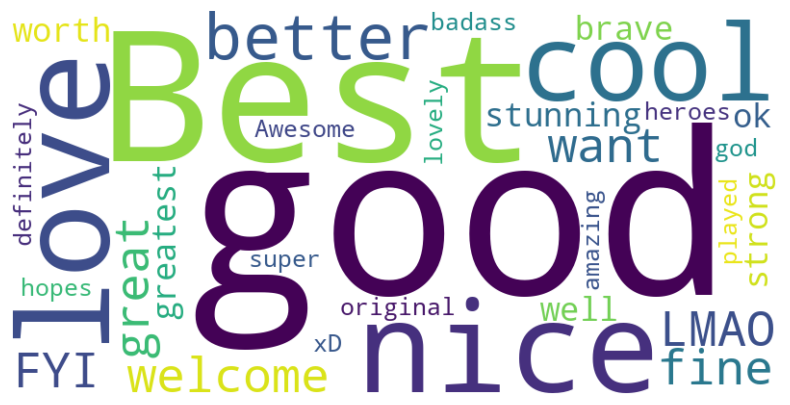

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("positives")
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

negatives


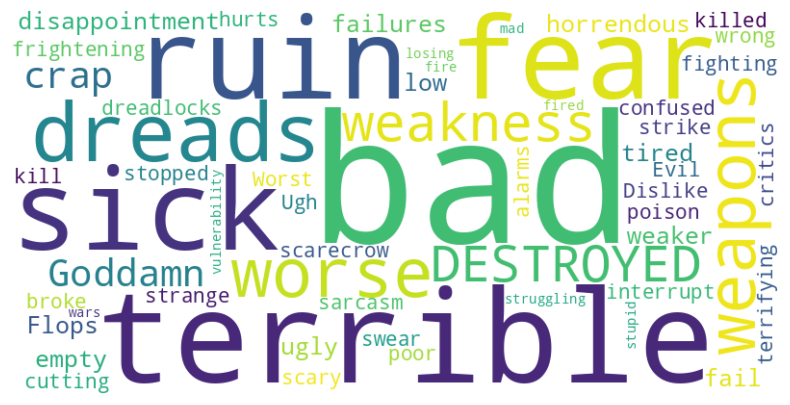

In [46]:
print("negatives")
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()